# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic and get familiar with ML basics


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## Data Fields

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton


In [33]:
# import pandas 
import pandas as pd

## Load Dataset

In [34]:
train = pd.read_csv("data/train.csv", index_col=["PassengerId"])
# train data의 row/columns 수 확인
print(train.shape)
# train data top 5 리스트 확인
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# train data structure 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [36]:
# train data 의 수치형 컬럼들에 대한 통계자료 확인
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
test = pd.read_csv("data/test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [39]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


## Preprocessing

### Encode Sex

In [40]:
# 성별을 feature 로 사용하기위해 수치형으로 encoding
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# test 데이터를 가지고 predict 를 해야 하기 때문에 train data 와 동일하게 전처리 해야 함
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### Fill in missing fare

In [42]:
# train data 'Fare' 의 평균값을 구함
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [43]:
# test data 에만 Fare 값이 없는 data가 1건 있기 때문에 train data의 평균값을 채워줌
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Encode Embarked

In [44]:
# One Hot Encoding : Embarked 컬럼의 값(C,S,Q)을 세게의 컬럼으로 추가 후 수치형(0 or 1) 로 변환
# Boolean 값(True/False) 는 0/1 로 인식하기 때문에 수치형으로 변환 불필요
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [45]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### Add Family feature

In [46]:
train["Family"] = train["SibSp"] + train["Parch"]

print(train.shape)
train[["SibSp", "Parch", "Family"]].head()

(891, 15)


,SibSp,Parch,Family
PassengerId,,,
1,1,0,1
2,1,0,1
3,0,0,0
4,1,0,1
5,0,0,0


In [47]:
test["Family"] = test["SibSp"] + test["Parch"]

print(test.shape)
test[["SibSp", "Parch", "Family"]].head()

(418, 14)


,SibSp,Parch,Family
PassengerId,,,
892,0,0,0
893,1,0,1
894,0,0,0
895,0,0,0
896,1,1,2


## Train

In [48]:
# train 할 feature 를 선택
feature_names = ["Pclass", "Sex", "Fare", "Family", "Embarked_C", "Embarked_Q", "Embarked_S"]

# 전체 train 데이터에서 실제 train 할 데이터셋(DataFrame) 준비
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 7)


,Pclass,Sex,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,3,0,7.2500,1,False,False,True
2,1,1,71.2833,1,True,False,False
3,3,1,7.9250,0,False,False,True
4,1,1,53.1000,1,False,False,True
5,3,0,8.0500,0,False,False,True


In [49]:
# 예측(predict) 하려는 필드 선택 
label_name = "Survived"

# 전체 train 데이터에서 결과값 데이터셋 준비
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [50]:
# sikitlearn 에서 DecisionTreeClassifier import
from sklearn.tree import DecisionTreeClassifier

# random_state 값 : DecisionTreeClassifier 내에서 random 값 사용 시 항상 동일한 결과가 나오도록 하기 위함
# random_state 값을 주지 않으면 매번 예측결과가 random 값의 영향을 받아서 좋아진건지, 모델이 좋아서 그런건지 알 수 없음
seed = 37

# 예측 모델 생성 : decision tree
model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)

#### Model Evaluation
* 모델을 사용하기 전에 모델이 신규 데이터를 얼마나 잘 예측하는지 알아야 함
* scikit-learn model evaluation : http://scikit-learn.org/stable/modules/model_evaluation.html

In [51]:
from sklearn.model_selection import cross_val_score

# cv : Cross Validator
#      None 이면 디폴트인 3-폴드 CV
#      숫자 K 이면 K-폴드 CV
#      Cross Validator 클래스 객체
# scoring : 성능 검증에 사용할 함수 (기존 함수 뿐만 아니라 사용자 정의 함수 구현 후 지정 할 수 있음)
score = cross_val_score(model, X_train, y_train, cv=20, scoring='accuracy').mean()
print("Score = {0:.5f}".format(score))

Score = 0.79356


In [52]:
# 예측모델에 train 데이터와 결과 데이터를 주고 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

#### Calculate feature importances

In [53]:
importances = model.feature_importances_
importance_by_feature = list(zip(feature_names, importances))
print(importance_by_feature)

[('Pclass', 0.15739577417662642), ('Sex', 0.59709061467744573), ('Fare', 0.16688343438261266), ('Family', 0.062921379465351646), ('Embarked_C', 0.0032090057581734021), ('Embarked_Q', 0.0), ('Embarked_S', 0.012499791539790073)]


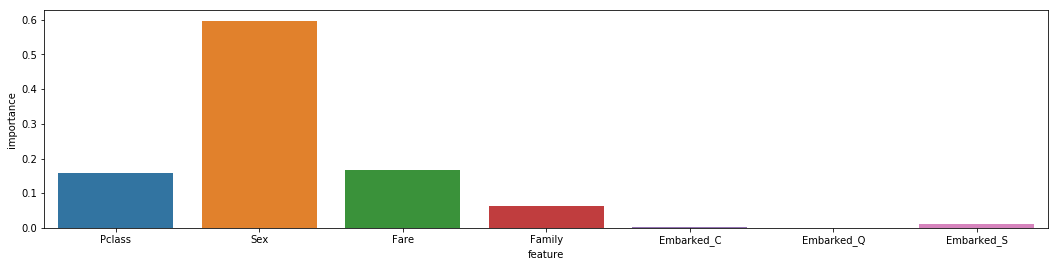

In [54]:
# Exploratory data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# subplots 를 이용해서 차트 하나의 가로/세로 사이즈를 조정하고 싶을 경우 응용
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

importance_df = pd.DataFrame(importance_by_feature, columns=['feature', 'importance'])
sns.barplot(data=importance_df, x='feature', y='importance', ax=ax1)

## Visualize

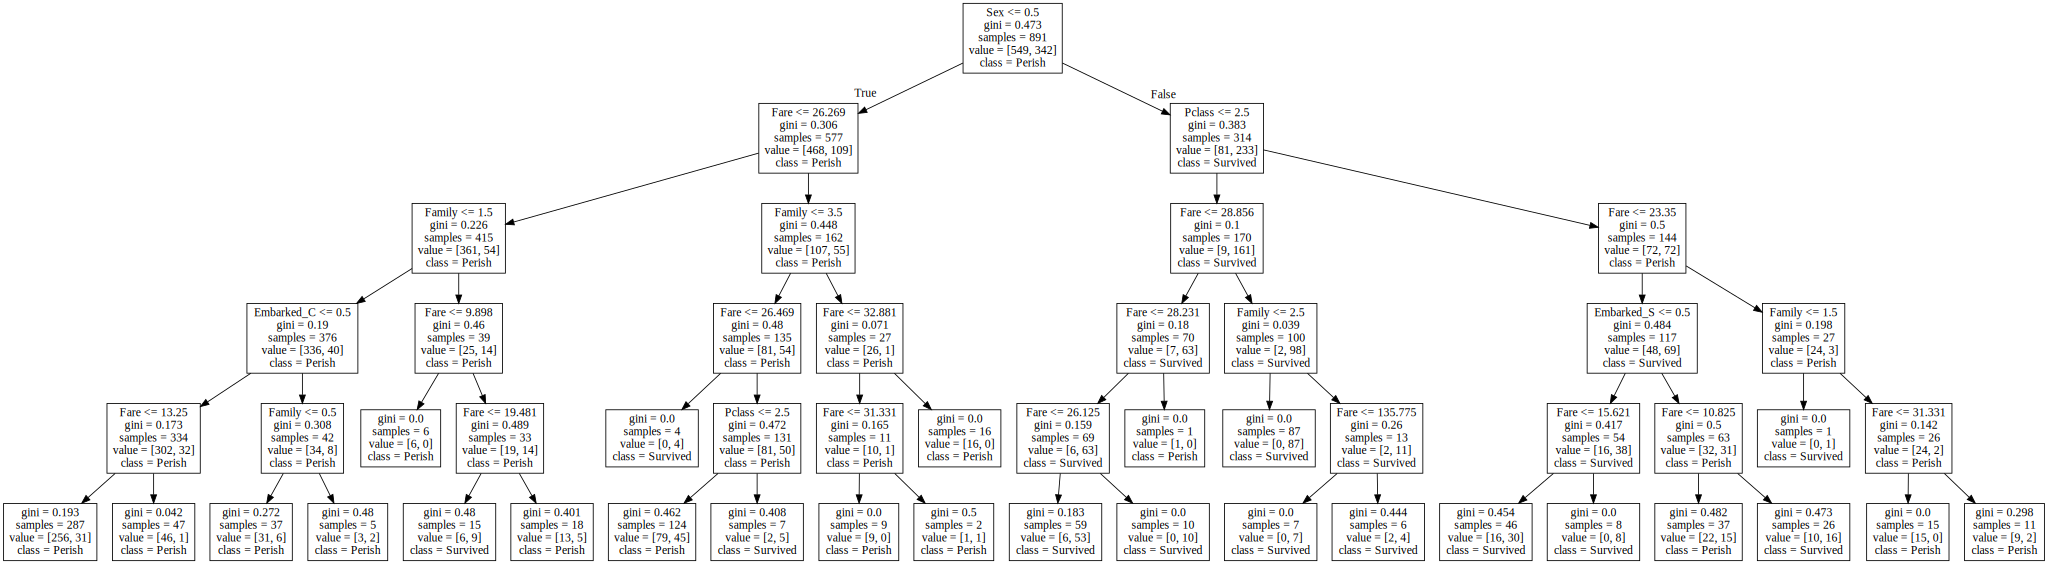

In [55]:
# Warning: You should install graphviz before run these codes.
# 1) Download Graphviz - http://www.graphviz.org/`Download.php
# 2) install graphviz - 'pip install graphviz' from terminal or install graphviz from Anaconda Navigator.

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Predict

In [56]:
# test 데이터셋 준비 (train 데이터셋과 동일한 feature 사용)
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 7)


,Pclass,Sex,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
892,3,0,7.8292,0,False,True,False
893,3,1,7.0000,1,False,False,True
894,2,0,9.6875,0,False,True,False
895,3,0,8.6625,0,False,False,True
896,3,1,12.2875,2,False,False,True


In [57]:
# 학습이 완료된 model 로 test 데이터셋의 결과값을 예측
prediction = model.predict(X_test)

print(prediction.shape)
prediction[:20]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

## Submit

In [58]:
# 제출할 파일을 만들기 위해 템플릿 파일 load
submission = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")

# Survived 컬럼에 예측결과 값으로 업데이트
submission["Survived"] = prediction

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [59]:
# 저장할 파일을 구분하기 위해 파일명에 timestamp 정보 추가 하기 위한 작업 
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "titanic-decision-tree"

filename = "{date}_{desc}_{score}.csv".format(date=current_date, desc=description, score="{0:.5f}".format(score))
filepath = "data/{filename}".format(filename=filename)

submission.to_csv(filepath, index=True)